In [18]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib import ticker
import cartopy.feature as cfeature
import pandas as pd
from pathlib import Path
import xesmf as xe
import dask.array


In [19]:
CESM2_ssp126 = xr.open_dataset("/Users/saituumi/miniconda3/e440/Project/loading_data/ssp126_CESM2.nc")
CESM2_ssp370 = xr.open_dataset("/Users/saituumi/miniconda3/e440/Project/loading_data/ssp370_CESM2.nc")
CESM2_ssp585 = xr.open_dataset("/Users/saituumi/miniconda3/e440/Project/loading_data/ssp585_CESM2.nc")

CESM2_ssp126_2100 = CESM2_ssp126.mean(dim = ("dcpp_init_year")).isel(time = -1) 
CESM2_ssp126_2015 = CESM2_ssp126.mean(dim = ("dcpp_init_year")).isel(time = 0)
CESM2_ssp126_abs_diff = CESM2_ssp126_2100.ph.values - CESM2_ssp126_2015.ph.values
CESM2_ssp126_abs_diff_fgco2 = CESM2_ssp126_2100.fgco2.values - CESM2_ssp126_2015.fgco2.values

CESM2_ssp370_2100 = CESM2_ssp370.mean(dim = ("dcpp_init_year")).isel(time = -1) 
CESM2_ssp370_2015 = CESM2_ssp370.mean(dim = ("dcpp_init_year")).isel(time = 0)
CESM2_ssp370_abs_diff = CESM2_ssp370_2100.ph.values - CESM2_ssp370_2015.ph.values
CESM2_ssp370_abs_diff_fgco2 = CESM2_ssp370_2100.fgco2.values - CESM2_ssp370_2015.fgco2.values

CESM2_ssp585_2100 = CESM2_ssp585.mean(dim = ("dcpp_init_year")).isel(time = -1) 
CESM2_ssp585_2015 = CESM2_ssp585.mean(dim = ("dcpp_init_year")).isel(time = 0)
CESM2_ssp585_abs_diff = CESM2_ssp585_2100.ph.values - CESM2_ssp585_2015.ph.values
CESM2_ssp585_abs_diff_fgco2 = CESM2_ssp585_2100.fgco2.values - CESM2_ssp585_2015.fgco2.values

In [20]:
CMCC_ssp126 = xr.open_dataset("/Users/saituumi/miniconda3/e440/Project/loading_data/ssp126_CMCC.nc")
CMCC_ssp370 = xr.open_dataset("/Users/saituumi/miniconda3/e440/Project/loading_data/ssp370_CMCC.nc")
CMCC_ssp585 = xr.open_dataset("/Users/saituumi/miniconda3/e440/Project/loading_data/ssp585_CMCC.nc")

CMCC_ssp126_2100 = CMCC_ssp126.mean(dim = ("dcpp_init_year")).isel(time = -1) 
CMCC_ssp126_2015 = CMCC_ssp126.mean(dim = ("dcpp_init_year")).isel(time = 0)
CMCC_ssp126_abs_diff = CMCC_ssp126_2100.ph.values - CMCC_ssp126_2015.ph.values
CMCC_ssp126_abs_diff_fco2 = CMCC_ssp126_2100.fgco2.values - CMCC_ssp126_2015.fgco2.values

CMCC_ssp370_2100 = CMCC_ssp370.mean(dim = ("dcpp_init_year")).isel(time = -1) 
CMCC_ssp370_2015 = CMCC_ssp370.mean(dim = ("dcpp_init_year")).isel(time = 0)
CMCC_ssp370_abs_diff = CMCC_ssp370_2100.ph.values - CMCC_ssp370_2015.ph.values
CMCC_ssp370_abs_diff_fgco2 = CMCC_ssp370_2100.fgco2.values - CMCC_ssp370_2015.fgco2.values

CMCC_ssp585_2100 = CMCC_ssp585.mean(dim = ("dcpp_init_year")).isel(time = -1) 
CMCC_ssp585_2015 = CMCC_ssp585.mean(dim = ("dcpp_init_year")).isel(time = 0)
CMCC_ssp585_abs_diff = CMCC_ssp585_2100.ph.values - CMCC_ssp585_2015.ph.values
CMCC_ssp585_abs_diff_fgco2 = CMCC_ssp585_2100.fgco2.values - CMCC_ssp585_2015.fgco2.values


In [21]:
CESM2_ssp126

<xarray.Dataset>
Dimensions:         (nlat: 384, nlon: 320, time: 86, dcpp_init_year: 1,
                     vertices: 4, d2: 2)
Coordinates:
  * nlat            (nlat) int32 1 2 3 4 5 6 7 8 ... 378 379 380 381 382 383 384
  * nlon            (nlon) int32 1 2 3 4 5 6 7 8 ... 314 315 316 317 318 319 320
  * time            (time) object 2015-07-02 13:00:00.000007 ... 2100-07-02 1...
  * dcpp_init_year  (dcpp_init_year) float64 nan
    lat             (nlat, nlon) float64 ...
    lat_bnds        (nlat, nlon, vertices) float32 ...
    lon             (nlat, nlon) float64 ...
    lon_bnds        (nlat, nlon, vertices) float32 ...
    time_bnds       (time, d2) object ...
    lev             float64 ...
    lev_bnds        (d2) float32 ...
Dimensions without coordinates: vertices, d2
Data variables:
    fgco2           (dcpp_init_year, time, nlat, nlon) float32 nan nan ... nan
    ph              (dcpp_init_year, time, nlat, nlon) float32 nan nan ... nan

In [22]:
def subset_southern_ocean(ds):

    southern_ocean_lat_min = -90.0
    southern_ocean_lat_max = -60.0

    if 'lat' in ds.coords:
        southern_ocean_subset = ds.where(
            (ds['lat'] >= southern_ocean_lat_min) &
            (ds['lat'] <= southern_ocean_lat_max),
            drop=True
        )
        return southern_ocean_subset
    elif 'latitude' in ds.coords:
        southern_ocean_subset = ds.where(
            (ds['latitude'] >= southern_ocean_lat_min) &
            (ds['latitude'] <= southern_ocean_lat_max),
            drop=True
        )
        return southern_ocean_subset
    else:
        print("Warning: Latitude coordinates ('lat' or 'latitude') not found in the Dataset. Returning original Dataset.")
        return ds

# Example usage:
# Assuming you have loaded your datasets as xr.Dataset objects named
# CESM2_ssp126_2100 and CMCC_ssp126_2100

CESM2_ssp126_2100_so = subset_southern_ocean(CESM2_ssp126_2100)
CESM2_ssp126_2015_so = subset_southern_ocean(CESM2_ssp126_2015)
CMCC_ssp126_2100_so = subset_southern_ocean(CMCC_ssp126_2100)
CMCC_ssp126_2015_so = subset_southern_ocean(CMCC_ssp126_2015)

CESM2_ssp126_diff = CESM2_ssp126_2100_so - CESM2_ssp126_2015_so
CMCC_ssp126_diff = CMCC_ssp126_2100_so - CMCC_ssp126_2015_so

CESM2_ssp370_2100_so =  subset_southern_ocean(CESM2_ssp370_2100)
CESM2_ssp370_2015_so =  subset_southern_ocean(CESM2_ssp370_2015)
CMCC_ssp370_2100_so = subset_southern_ocean(CMCC_ssp370_2100)
CMCC_ssp370_2015_so = subset_southern_ocean(CMCC_ssp370_2015)

CESM2_ssp370_diff = CESM2_ssp370_2100_so - CESM2_ssp370_2015_so
CMCC_ssp370_diff = CMCC_ssp370_2100_so - CMCC_ssp370_2015_so


CESM2_ssp585_2100_so =  subset_southern_ocean(CESM2_ssp585_2100)
CESM2_ssp585_2015_so =  subset_southern_ocean(CESM2_ssp585_2015)
CMCC_ssp585_2100_so = subset_southern_ocean(CMCC_ssp585_2100)
CMCC_ssp585_2015_so = subset_southern_ocean(CMCC_ssp585_2015)

CESM2_ssp585_diff = CESM2_ssp585_2100_so - CESM2_ssp585_2015_so
CMCC_ssp585_diff = CMCC_ssp585_2100_so - CMCC_ssp585_2015_so

In [23]:
def create_regridder(source_ds, target_ds, method='bilinear', periodic=True):
    """
    Creates an xesmf Regridder object.

    Args:
        source_ds (xr.Dataset): The source xarray Dataset. Must contain 'lat'/'latitude' and 'lon'/'longitude'.
        target_ds (xr.Dataset): The target xarray Dataset. Must contain 'lat'/'latitude' and 'lon'/'longitude'.
        method (str, optional): The regridding method to use (e.g., 'bilinear', 'nearest_s2d'). Defaults to 'bilinear'.
        periodic (bool, optional): Whether the longitude is periodic. Defaults to True.

    Returns:
        xe.Regridder: The xesmf Regridder object. Returns None if necessary coordinates are missing.
    """
    source_lat = source_ds.coords.get('lat', source_ds.coords.get('latitude'))
    source_lon = source_ds.coords.get('lon', source_ds.coords.get('longitude'))
    target_lat = target_ds.coords.get('lat', target_ds.coords.get('latitude'))
    target_lon = target_ds.coords.get('lon', target_ds.coords.get('longitude'))

    if source_lat is None or source_lon is None or target_lat is None or target_lon is None:
        print("Error: Missing latitude or longitude coordinates in the source or target datasets.")
        return None

    regridder = xe.Regridder(source_ds, target_ds, method, periodic=periodic)
    return regridder

def regrid_dataset(ds, regridder, variable_to_regrid):
    """
    Applies a pre-existing Regridder to a specific variable in a Dataset.

    Args:
        ds (xr.Dataset): The Dataset containing the variable to regrid.
        regridder (xe.Regridder): The xesmf Regridder object.
        variable_to_regrid (str): The name of the variable in the Dataset to regrid.

    Returns:
        xr.DataArray: The regridded DataArray. Returns None if the variable is not found.
    """
    if variable_to_regrid in ds.data_vars:
        regridded_da = regridder(ds[variable_to_regrid])
        return regridded_da
    else:
        print(f"Error: Variable '{variable_to_regrid}' not found in the Dataset.")
        return None

# Load your datasets (replace with your actual file paths)

# --- Regrid each pair ---

# Pair 1: ssp126
regridder_ssp126 = create_regridder(CMCC_ssp126_diff, CESM2_ssp126_diff)
if regridder_ssp126:
    cmcc_ph_regridded_126 = regrid_dataset(CMCC_ssp126_diff, regridder_ssp126, 'ph')
    if cmcc_ph_regridded_126 is not None:
        print("Regridded CMCC 'ph' (ssp126):", cmcc_ph_regridded_126)


# Pair 2: ssp370
regridder_ssp370 = create_regridder(CMCC_ssp370_diff, CESM2_ssp126_diff)
if regridder_ssp370:
    cmcc_ph_regridded_370 = regrid_dataset(CMCC_ssp370_diff, regridder_ssp370, 'ph')
    if cmcc_ph_regridded_370 is not None:
        print("Regridded CMCC 'ph' (ssp370):", cmcc_ph_regridded_370)


# Pair 3: ssp585
regridder_ssp585 = create_regridder(CMCC_ssp585_diff, CESM2_ssp585_diff)
if regridder_ssp585:
    cmcc_ph_regridded_585 = regrid_dataset(CMCC_ssp585_diff, regridder_ssp585, 'ph')
    if cmcc_ph_regridded_585 is not None:
        print("Regridded CMCC 'ph' (ssp585):", cmcc_ph_regridded_585)


Regridded CMCC 'ph' (ssp126): <xarray.DataArray (nlat: 36, nlon: 320)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.03628398, -0.03692391, -0.03766005, ..., -0.03722605,
        -0.0364471 , -0.03604788],
       [-0.03725827, -0.03762679, -0.03792958, ..., -0.03927955,
        -0.03826572, -0.03751292],
       [-0.03806273, -0.03785015, -0.03795521, ..., -0.04094987,
        -0.0403208 , -0.03940365]], dtype=float32)
Coordinates:
    lev      float64 0.5126
  * nlat     (nlat) int32 1 2 3 4 5 6 7 8 9 10 ... 27 28 29 30 31 32 33 34 35 36
  * nlon     (nlon) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
    lon      (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 317.2 318.3 319.4
    lat      (nlat,

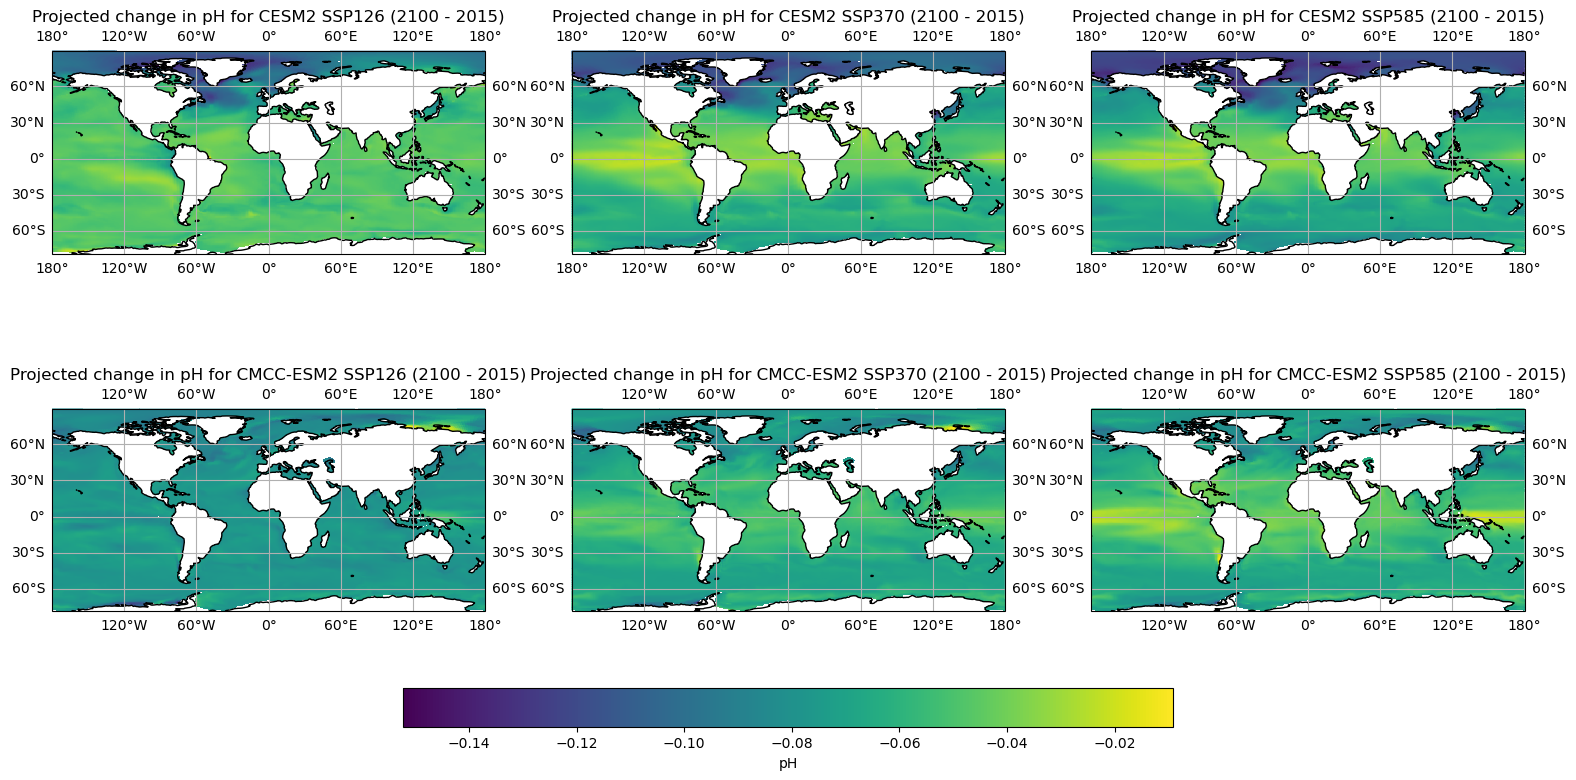

In [24]:
# make a 1×2 grid of PlateCarree axes
fig, axes = plt.subplots(
    nrows=2, ncols=3,
    figsize=(19, 10),
    subplot_kw={'projection': ccrs.PlateCarree()}
)
fig.subplots_adjust(hspace=0.2)

# first panel: historical
mesh1 = axes[0,0].pcolormesh(CESM2_ssp126_2100.lon, CESM2_ssp126_2100.lat, CESM2_ssp126_abs_diff, shading='auto', cmap='viridis')
axes[0,0].coastlines()
gl0 = axes[0,0].gridlines(draw_labels=True)
axes[0,0].set_title('Projected change in pH for CESM2 SSP126 (2100 - 2015)')

# second panel: replace hist2_mean with your second DataArray
mesh2 = axes[0,1].pcolormesh(
    CESM2_ssp126_2100.lon, CESM2_ssp126_2100.lat, CESM2_ssp370_abs_diff, shading='auto', cmap='viridis')
axes[0,1].coastlines()
gl1 = axes[0,1].gridlines(draw_labels=True)
axes[0,1].set_title('Projected change in pH for CESM2 SSP370 (2100 - 2015)')

# second panel: replace hist2_mean with your second DataArray
mesh3 = axes[0,2].pcolormesh(
    CESM2_ssp126_2100.lon, CESM2_ssp126_2100.lat, CESM2_ssp585_abs_diff, shading='auto', cmap='viridis')
axes[0,2].coastlines()
gl1 = axes[0,2].gridlines(draw_labels=True)
axes[0,2].set_title('Projected change in pH for CESM2 SSP585 (2100 - 2015)')

# first panel: historical
mesh4 = axes[1,0].pcolormesh(CMCC_ssp126_2100.longitude, CMCC_ssp126_2100.latitude, CMCC_ssp126_abs_diff, shading='auto', cmap='viridis')
axes[1,0].coastlines()
gl0 = axes[1,0].gridlines(draw_labels=True)
axes[1,0].set_title('Projected change in pH for CMCC-ESM2 SSP126 (2100 - 2015)')

# first panel: historical
mesh5 = axes[1,1].pcolormesh(CMCC_ssp126_2100.longitude, CMCC_ssp126_2100.latitude, CMCC_ssp370_abs_diff, shading='auto', cmap='viridis')
axes[1,1].coastlines()
gl0 = axes[1,1].gridlines(draw_labels=True)
axes[1,1].set_title('Projected change in pH for CMCC-ESM2 SSP370 (2100 - 2015)')

# first panel: historical
mesh6 = axes[1,2].pcolormesh(CMCC_ssp126_2100.longitude, CMCC_ssp126_2100.latitude, CMCC_ssp585_abs_diff, shading='auto', cmap='viridis')
axes[1,2].coastlines()
gl0 = axes[1,2].gridlines(draw_labels=True)
axes[1,2].set_title('Projected change in pH for CMCC-ESM2 SSP585 (2100 - 2015)')


# make one horiz. colorbar under both axes
cbar = fig.colorbar(
    mesh1,                      # could be mesh2, it just needs a mappable
    ax=axes,                    # list of the two axes objects
    orientation='horizontal',
    location='bottom',          # put it below
    fraction=0.05,              # fraction of the figure width
    pad=0.1,                   # space between subplots and colorbar
    label='pH'
)
cbar.locator = ticker.AutoLocator()
cbar.update_ticks()

plt.show()


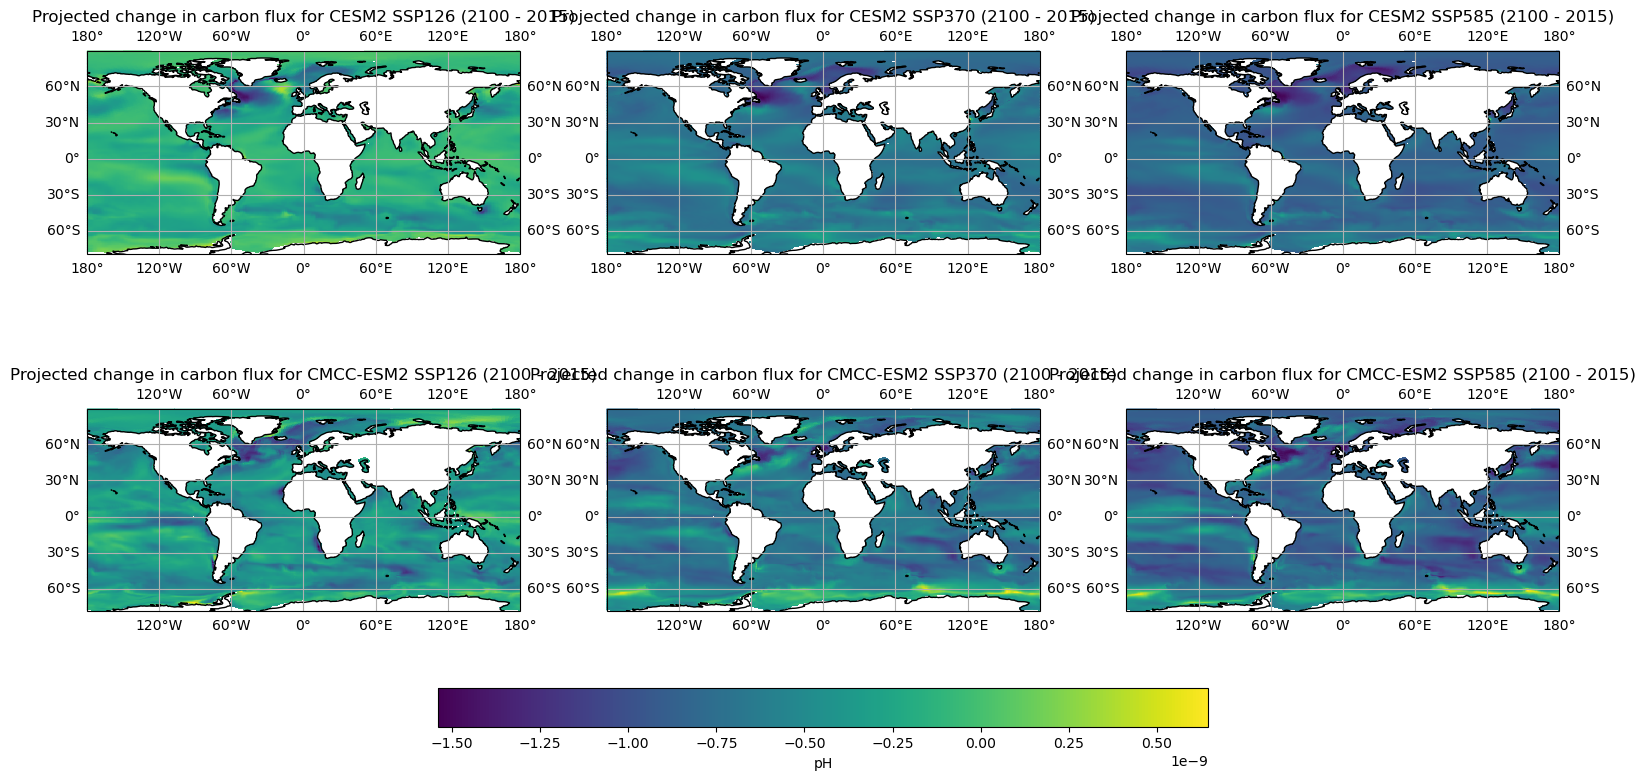

In [25]:
# make a 1×2 grid of PlateCarree axes
fig, axes = plt.subplots(
    nrows=2, ncols=3,
    figsize=(19, 10),
    subplot_kw={'projection': ccrs.PlateCarree()}
)
fig.subplots_adjust(hspace=0.2)


mesh1 = axes[0,0].pcolormesh(CESM2_ssp126_2100.lon, CESM2_ssp126_2100.lat, CESM2_ssp126_abs_diff_fgco2, shading='auto', cmap='viridis')
axes[0,0].coastlines()
gl0 = axes[0,0].gridlines(draw_labels=True)
axes[0,0].set_title('Projected change in carbon flux for CESM2 SSP126 (2100 - 2015)')


mesh2 = axes[0,1].pcolormesh(
    CESM2_ssp126_2100.lon, CESM2_ssp126_2100.lat, CESM2_ssp370_abs_diff_fgco2, shading='auto', cmap='viridis')
axes[0,1].coastlines()
gl1 = axes[0,1].gridlines(draw_labels=True)
axes[0,1].set_title('Projected change in carbon flux for CESM2 SSP370 (2100 - 2015)')


mesh3 = axes[0,2].pcolormesh(
    CESM2_ssp126_2100.lon, CESM2_ssp126_2100.lat, CESM2_ssp585_abs_diff_fgco2, shading='auto', cmap='viridis')
axes[0,2].coastlines()
gl1 = axes[0,2].gridlines(draw_labels=True)
axes[0,2].set_title('Projected change in carbon flux for CESM2 SSP585 (2100 - 2015)')


mesh4 = axes[1,0].pcolormesh(CMCC_ssp126_2100.longitude, CMCC_ssp126_2100.latitude, CMCC_ssp126_abs_diff_fco2, shading='auto', cmap='viridis')
axes[1,0].coastlines()
gl0 = axes[1,0].gridlines(draw_labels=True)
axes[1,0].set_title('Projected change in carbon flux for CMCC-ESM2 SSP126 (2100 - 2015)')



mesh5 = axes[1,1].pcolormesh(CMCC_ssp126_2100.longitude, CMCC_ssp126_2100.latitude, CMCC_ssp370_abs_diff_fgco2, shading='auto', cmap='viridis')
axes[1,1].coastlines()
gl0 = axes[1,1].gridlines(draw_labels=True)
axes[1,1].set_title('Projected change in carbon flux for CMCC-ESM2 SSP370 (2100 - 2015)')


mesh6 = axes[1,2].pcolormesh(CMCC_ssp126_2100.longitude, CMCC_ssp126_2100.latitude, CMCC_ssp585_abs_diff_fgco2, shading='auto', cmap='viridis')
axes[1,2].coastlines()
gl0 = axes[1,2].gridlines(draw_labels=True)
axes[1,2].set_title('Projected change in carbon flux for CMCC-ESM2 SSP585 (2100 - 2015)')


# make one horiz. colorbar under both axes
cbar = fig.colorbar(
    mesh1,                      # could be mesh2, it just needs a mappable
    ax=axes,                    # list of the two axes objects
    orientation='horizontal',
    location='bottom',          # put it below
    fraction=0.05,              # fraction of the figure width
    pad=0.1,                   # space between subplots and colorbar
    label='pH'
)
cbar.locator = ticker.AutoLocator()
cbar.update_ticks()

plt.show()


In [26]:
# Pair 1: ssp126
regridder_ssp126_trop = create_regridder(CMCC_ssp126_diff, CESM2_ssp126_diff)
if regridder_ssp126:
    cmcc_ph_regridded_126 = regrid_dataset(CMCC_ssp126_diff, regridder_ssp126, 'ph')
    if cmcc_ph_regridded_126 is not None:
        print("Regridded CMCC 'ph' (ssp126):", cmcc_ph_regridded_126)


# Pair 2: ssp370
regridder_ssp370_trop = create_regridder(CMCC_ssp370_diff, CESM2_ssp126_diff)
if regridder_ssp370:
    cmcc_ph_regridded_370 = regrid_dataset(CMCC_ssp370_diff, regridder_ssp370, 'ph')
    if cmcc_ph_regridded_370 is not None:
        print("Regridded CMCC 'ph' (ssp370):", cmcc_ph_regridded_370)


# Pair 3: ssp585
regridder_ssp585_trop = create_regridder(CMCC_ssp585_diff, CESM2_ssp370_diff)
if regridder_ssp585:
    cmcc_ph_regridded_585 = regrid_dataset(CMCC_ssp585_diff, regridder_ssp585, 'ph')
    if cmcc_ph_regridded_585 is not None:
        print("Regridded CMCC 'ph' (ssp585):", cmcc_ph_regridded_585)

Regridded CMCC 'ph' (ssp126): <xarray.DataArray (nlat: 36, nlon: 320)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.03628398, -0.03692391, -0.03766005, ..., -0.03722605,
        -0.0364471 , -0.03604788],
       [-0.03725827, -0.03762679, -0.03792958, ..., -0.03927955,
        -0.03826572, -0.03751292],
       [-0.03806273, -0.03785015, -0.03795521, ..., -0.04094987,
        -0.0403208 , -0.03940365]], dtype=float32)
Coordinates:
    lev      float64 0.5126
  * nlat     (nlat) int32 1 2 3 4 5 6 7 8 9 10 ... 27 28 29 30 31 32 33 34 35 36
  * nlon     (nlon) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
    lon      (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 317.2 318.3 319.4
    lat      (nlat,

/opt/miniconda3/envs/t5/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: No contour levels were found within the data range.
  result = super().contour(*args, **kwargs)
/opt/miniconda3/envs/t5/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: No contour levels were found within the data range.
  result = super().contour(*args, **kwargs)
/opt/miniconda3/envs/t5/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: No contour levels were found within the data range.
  result = super().contour(*args, **kwargs)
/opt/miniconda3/envs/t5/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: No contour levels were found within the data range.
  result = super().contour(*args, **kwargs)
/opt/miniconda3/envs/t5/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: No contour levels were found within the data range.
  result = super().contour(*args, **kwargs)
/opt/miniconda3/envs/t5/lib/python3.10/site-p

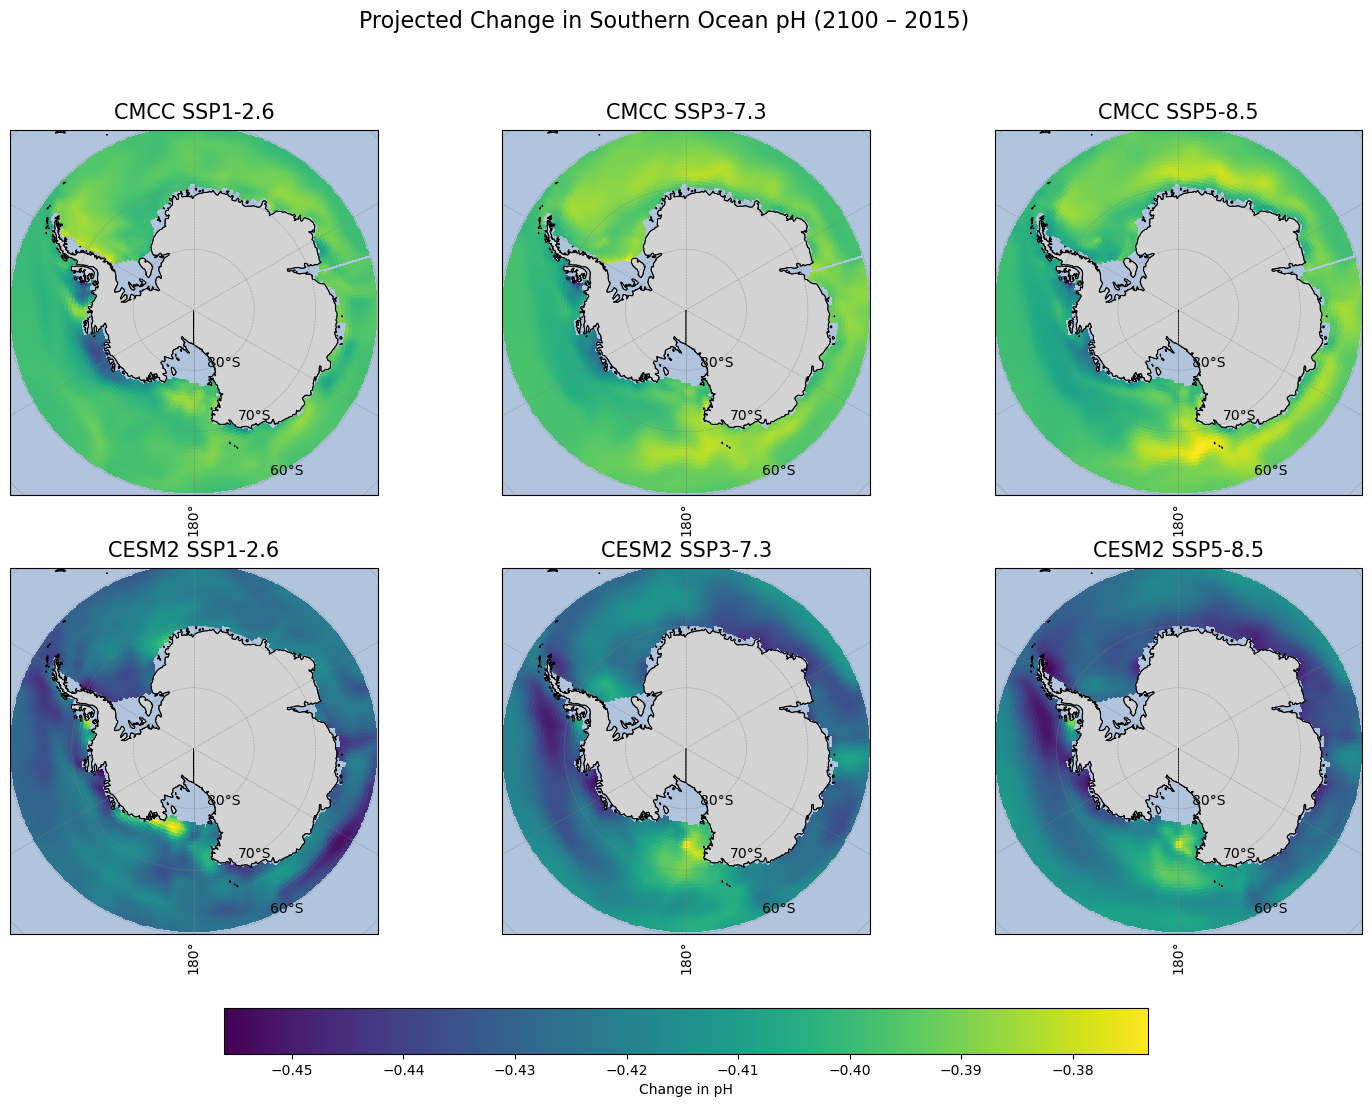

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# 1) Start with your raw six objects
raw = [
    cmcc_ph_regridded_126,
    cmcc_ph_regridded_370,
    cmcc_ph_regridded_585,
    CESM2_ssp126_diff,
    CESM2_ssp370_diff,
    CESM2_ssp585_diff,
]
titles = [
    'CMCC SSP1‑2.6','CMCC SSP3‑7.3','CMCC SSP5‑8.5',
    'CESM2 SSP1‑2.6','CESM2 SSP3‑7.3','CESM2 SSP5‑8.5',
]

# Turn every entry into a proper DataArray named da with dims (lat,lon)
clean = []
for ds in raw:
    if isinstance(ds, xr.Dataset):
        da = ds['ph']       # pull out the ph variable
    else:
        da = ds             # already a DataArray

    # if dims are named 'latitude'/'longitude', rename them
    rename_map = {}
    if 'latitude'  in da.dims: rename_map['latitude']  = 'lat'
    if 'longitude' in da.dims: rename_map['longitude'] = 'lon'
    if rename_map:
        da = da.rename(rename_map)

    clean.append(da)

# Plot all the six in a 2×3
levels = np.arange(7.7, 8.2, 0.1)
cmap   = 'viridis'

fig, axes = plt.subplots(
    2, 3, figsize=(18, 12),
    subplot_kw={'projection': ccrs.SouthPolarStereo()}
)

for ax, da, ttl in zip(axes.flatten(), clean, titles):
    da = da.assign_coords(lon = xr.where(da.lon>180, da.lon-360, da.lon))

    ax.set_extent([-180,180,-90,-60], crs=ccrs.PlateCarree())
    ax.set_facecolor('lightsteelblue')
    ax.add_feature(cfeature.LAND.with_scale('50m'),
                   facecolor='lightgray', edgecolor='black', linewidth=0.5)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'),
                   linewidth=0.8)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.4, color='gray', linestyle='--', alpha=0.7)
    gl.top_labels    = False
    gl.bottom_labels = True
    gl.left_labels   = True
    gl.right_labels  = False
    gl.xlabel_style  = {'size':10}
    gl.ylabel_style  = {'size':10}
    gl.xformatter    = LongitudeFormatter()
    gl.yformatter    = LatitudeFormatter()

    pcm = ax.pcolormesh(da.lon, da.lat, da,
                        transform=ccrs.PlateCarree(),
                        cmap=cmap, shading='auto')
    cs = ax.contour(da.lon, da.lat, da,
                    levels=levels, colors='black',
                    linewidths=0.5, transform=ccrs.PlateCarree())
    ax.clabel(cs, fmt='%.1f', fontsize=8)

    ax.set_title(ttl, fontsize=15, pad=8)

# shared colorbar and super‐title
cbar = fig.colorbar(pcm, ax=axes.ravel().tolist(),
                    orientation='horizontal', pad=0.08, fraction=0.05,
                    label='Change in pH')
cbar.ax.tick_params(labelsize=10)

plt.suptitle('Projected Change in Southern Ocean pH (2100 – 2015)',
             fontsize=16, y=0.98)

plt.savefig("OS_ph")
plt.show()


/opt/miniconda3/envs/t5/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: No contour levels were found within the data range.
  result = super().contour(*args, **kwargs)
/opt/miniconda3/envs/t5/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: No contour levels were found within the data range.
  result = super().contour(*args, **kwargs)
/opt/miniconda3/envs/t5/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: No contour levels were found within the data range.
  result = super().contour(*args, **kwargs)


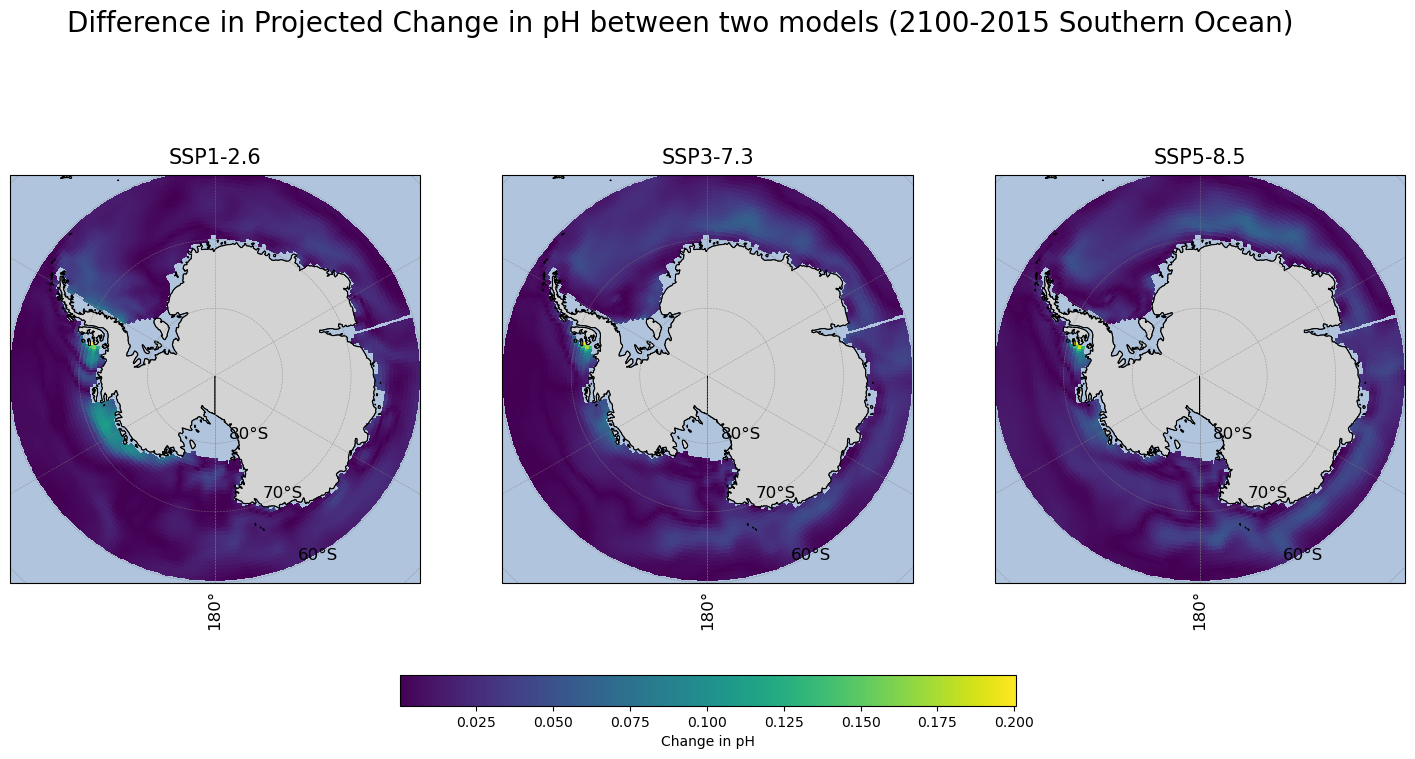

In [28]:
bias_SSP126_so = np.abs(CESM2_ssp126_diff - cmcc_ph_regridded_126)
bias_SSP373_so = np.abs(CESM2_ssp370_diff - cmcc_ph_regridded_370)
bias_SSP585_so = np.abs(CESM2_ssp585_diff - cmcc_ph_regridded_585)

# 1) Make sure each entry is a DataArray, not a Dataset
raw = [
    bias_SSP126_so,
    bias_SSP373_so,
    bias_SSP585_so ]
    
datasets = []

for ds in raw:
    if isinstance(ds, xr.Dataset):
        # assume 'ph' is the variable you want:
        datasets.append(ds['ph'])
    else:
        datasets.append(ds)

titles = ['SSP1‑2.6', 'SSP3‑7.3', 'SSP5‑8.5']

levels = np.arange(7.7, 8.2, 0.1)
cmap   = 'viridis'

fig, axes = plt.subplots(
    1, 3, figsize=(18, 8),
    subplot_kw={'projection': ccrs.SouthPolarStereo()}
)

for da, ax, ttl in zip(datasets, axes, titles):
    # wrap lon into –180…180
    da = da.assign_coords(lon=xr.where(da.lon > 180, da.lon - 360, da.lon))

    ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax.set_facecolor('lightsteelblue')

    ax.add_feature(cfeature.LAND.with_scale('50m'),
                   facecolor='lightgray', edgecolor='black', linewidth=0.5)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'),
                   linewidth=0.8)

    # modern gridliner API
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.4, color='gray', linestyle='--', alpha=0.7)
    gl.top_labels    = False
    gl.bottom_labels = True
    gl.left_labels   = True
    gl.right_labels  = False
    gl.xlabel_style  = {'size':12}
    gl.ylabel_style  = {'size':12}
    gl.xformatter    = LongitudeFormatter()
    gl.yformatter    = LatitudeFormatter()

    # now da is guaranteed a DataArray
    pcm = ax.pcolormesh(da.lon, da.lat, da,
                        transform=ccrs.PlateCarree(),
                        cmap=cmap, shading='auto')

    cs = ax.contour(da.lon, da.lat, da,
                    levels=levels, colors='black',
                    linewidths=0.5, transform=ccrs.PlateCarree())
    ax.clabel(cs, fmt='%.1f', fontsize=10)

    ax.set_title(ttl, fontsize=15, pad=8)

cbar = fig.colorbar(pcm, ax=axes.tolist(),
                    orientation='horizontal',
                    pad=0.15, fraction=0.05,
                    label='Change in pH')
cbar.ax.tick_params(labelsize=10)

plt.suptitle('Difference in Projected Change in pH between two models (2100-2015 Southern Ocean) ',
             fontsize=20, y=0.98)
plt.show()

# CESM2 - CMCC-ESM2


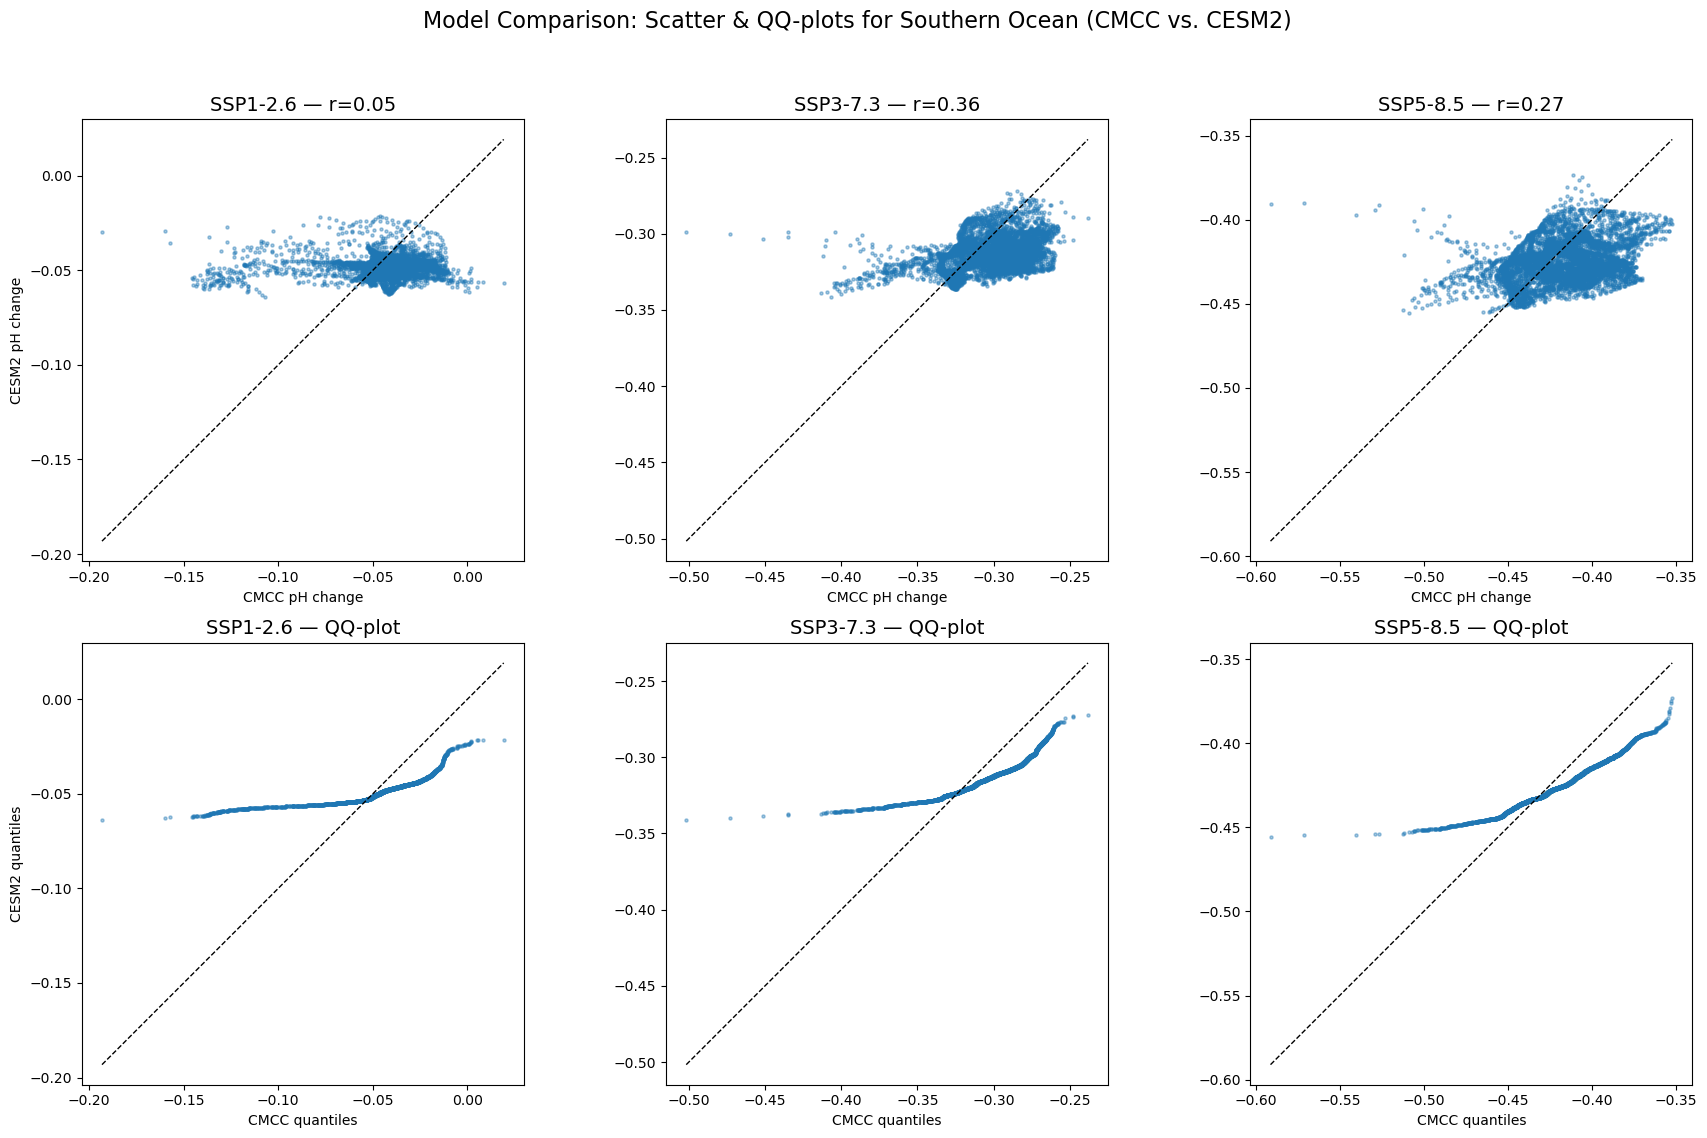

<Figure size 640x480 with 0 Axes>

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# === Setup for 3 pairs of models ===
cmcc_list = [
    cmcc_ph_regridded_126,
    cmcc_ph_regridded_370,
    cmcc_ph_regridded_585,
]
cesm_list = [
    CESM2_ssp126_diff,
    CESM2_ssp370_diff,
    CESM2_ssp585_diff,
]
titles = ['SSP1‑2.6', 'SSP3‑7.3', 'SSP5‑8.5']

# === Helper to extract DataArray from Dataset ===
def to_da(ds, var='ph'):
    return ds[var] if isinstance(ds, xr.Dataset) else ds

# === Create 2x3 grid ===
fig, axes = plt.subplots(2, 3, figsize=(18, 11))

for i, (cmcc_raw, cesm_raw, scenario) in enumerate(zip(cmcc_list, cesm_list, titles)):
    # Clean up
    cmcc = to_da(cmcc_raw)
    cesm = to_da(cesm_raw)

    # Flatten & mask
    x = cmcc.values.ravel()
    y = cesm.values.ravel()
    mask = np.isfinite(x) & np.isfinite(y)
    x = x[mask]
    y = y[mask]
    
    # Scatter plot
    ax_scatter = axes[0, i]
    ax_scatter.scatter(x, y, s=5, alpha=0.4)
    lims = [min(x.min(), y.min()), max(x.max(), y.max())]
    ax_scatter.plot(lims, lims, 'k--', lw=1)
    ax_scatter.set_aspect('equal', 'box')
    ax_scatter.set_xlabel('CMCC pH change')
    ax_scatter.set_ylabel('CESM2 pH change' if i == 0 else '')
    r = np.corrcoef(x, y)[0, 1]
    ax_scatter.set_title(f'{scenario} — r={r:.2f}', fontsize=14)

    # QQ plot
    ax_qq = axes[1, i]
    x_sorted = np.sort(x)
    y_sorted = np.sort(y)
    ax_qq.scatter(x_sorted, y_sorted, s=5, alpha=0.4)
    ax_qq.plot(lims, lims, 'k--', lw=1)
    ax_qq.set_aspect('equal', 'box')
    ax_qq.set_xlabel('CMCC quantiles')
    ax_qq.set_ylabel('CESM2 quantiles' if i == 0 else '')
    ax_qq.set_title(f'{scenario} — QQ-plot', fontsize=14)

plt.suptitle('Model Comparison: Scatter & QQ-plots for Southern Ocean (CMCC vs. CESM2)', fontsize=16, y=1.03)
plt.savefig("stat_test")
plt.tight_layout()
plt.show()



/opt/miniconda3/envs/t5/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: No contour levels were found within the data range.
  result = super().contour(*args, **kwargs)
/opt/miniconda3/envs/t5/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: No contour levels were found within the data range.
  result = super().contour(*args, **kwargs)
/opt/miniconda3/envs/t5/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: No contour levels were found within the data range.
  result = super().contour(*args, **kwargs)


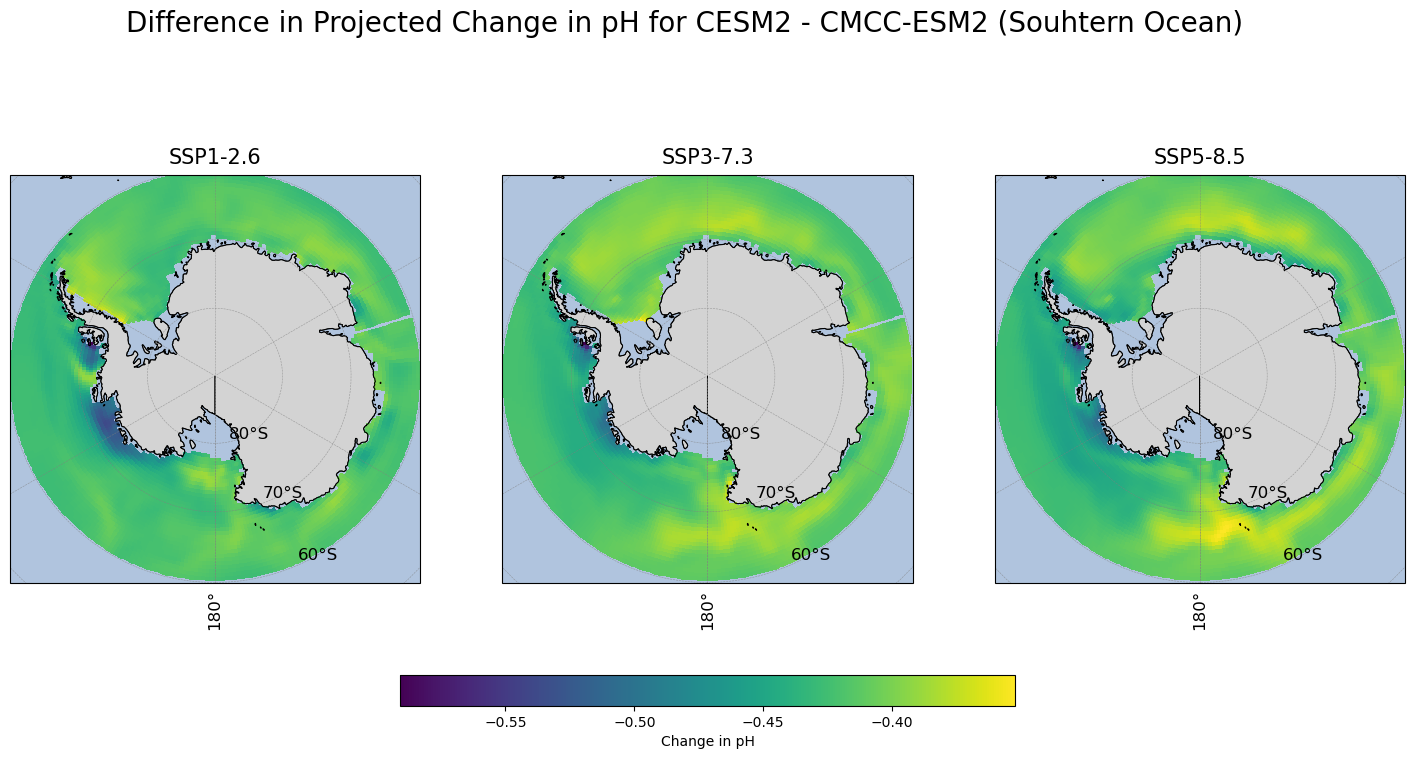

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# 1) Make sure each entry is a DataArray, not a Dataset
raw = [
    cmcc_ph_regridded_126,
    cmcc_ph_regridded_370,
    cmcc_ph_regridded_585
]
datasets = []
for ds in raw:
    if isinstance(ds, xr.Dataset):
        # assume 'ph' is the variable you want:
        datasets.append(ds['ph'])
    else:
        datasets.append(ds)

titles = ['SSP1‑2.6', 'SSP3‑7.3', 'SSP5‑8.5']

levels = np.arange(7.7, 8.2, 0.1)
cmap   = 'viridis'

fig, axes = plt.subplots(
    1, 3, figsize=(18, 8),
    subplot_kw={'projection': ccrs.SouthPolarStereo()}
)

for da, ax, ttl in zip(datasets, axes, titles):
    # wrap lon into –180…180
    da = da.assign_coords(lon=xr.where(da.lon > 180, da.lon - 360, da.lon))

    ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax.set_facecolor('lightsteelblue')

    ax.add_feature(cfeature.LAND.with_scale('50m'),
                   facecolor='lightgray', edgecolor='black', linewidth=0.5)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'),
                   linewidth=0.8)

    # modern gridliner API
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.4, color='gray', linestyle='--', alpha=0.7)
    gl.top_labels    = False
    gl.bottom_labels = True
    gl.left_labels   = True
    gl.right_labels  = False
    gl.xlabel_style  = {'size':12}
    gl.ylabel_style  = {'size':12}
    gl.xformatter    = LongitudeFormatter()
    gl.yformatter    = LatitudeFormatter()

    # now da is guaranteed a DataArray
    pcm = ax.pcolormesh(da.lon, da.lat, da,
                        transform=ccrs.PlateCarree(),
                        cmap=cmap, shading='auto')

    cs = ax.contour(da.lon, da.lat, da,
                    levels=levels, colors='black',
                    linewidths=0.5, transform=ccrs.PlateCarree())
    ax.clabel(cs, fmt='%.1f', fontsize=10)

    ax.set_title(ttl, fontsize=15, pad=8)

cbar = fig.colorbar(pcm, ax=axes.tolist(),
                    orientation='horizontal',
                    pad=0.15, fraction=0.05,
                    label='Change in pH')
cbar.ax.tick_params(labelsize=10)

plt.suptitle('Difference in Projected Change in pH for CESM2 - CMCC-ESM2 (Souhtern Ocean)',
             fontsize=20, y=0.98)
plt.show()


In [32]:
cmcc_ph_regridded_585

<xarray.DataArray (nlat: 36, nlon: 320)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.41968885, -0.41860333, -0.41834363, ..., -0.4262613 ,
        -0.42403784, -0.42171645],
       [-0.42117214, -0.4206713 , -0.42070946, ..., -0.42659765,
        -0.42495075, -0.42283818],
       [-0.42302606, -0.42219645, -0.42279273, ..., -0.4267667 ,
        -0.42600223, -0.42475015]], dtype=float32)
Coordinates:
    lev      float64 0.5126
  * nlat     (nlat) int32 1 2 3 4 5 6 7 8 9 10 ... 27 28 29 30 31 32 33 34 35 36
  * nlon     (nlon) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
    lon      (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 317.2 318.3 319.4
    lat      (nlat, nlon) float64 -79.22 -79.22 -79.22 ... -60.52 -60.52 -60.52
Attributes:
    regrid_method:  bilinear

In [33]:

CESM2_ssp585_diff

<xarray.Dataset>
Dimensions:   (nlat: 36, nlon: 320, vertices: 4, d2: 2)
Coordinates:
  * nlat      (nlat) int32 1 2 3 4 5 6 7 8 9 10 ... 28 29 30 31 32 33 34 35 36
  * nlon      (nlon) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
    lat       (nlat, nlon) float64 -79.22 -79.22 -79.22 ... -60.52 -60.52 -60.52
    lat_bnds  (nlat, nlon, vertices) float32 -79.49 -79.49 ... -60.25 -60.25
    lon       (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 317.2 318.3 319.4
    lon_bnds  (nlat, nlon, vertices) float32 320.0 321.1 321.1 ... 320.0 318.9
    lev       float64 500.0
    lev_bnds  (d2) float32 0.0 10.0
Dimensions without coordinates: vertices, d2
Data variables:
    fgco2     (nlat, nlon) float32 nan nan nan ... 3.152e-10 3.325e-10 3.305e-10
    ph        (nlat, nlon) float32 nan nan nan nan ... -0.431 -0.431 -0.431

In [34]:



cmcc_ph_regridded_585

<xarray.DataArray (nlat: 36, nlon: 320)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.41968885, -0.41860333, -0.41834363, ..., -0.4262613 ,
        -0.42403784, -0.42171645],
       [-0.42117214, -0.4206713 , -0.42070946, ..., -0.42659765,
        -0.42495075, -0.42283818],
       [-0.42302606, -0.42219645, -0.42279273, ..., -0.4267667 ,
        -0.42600223, -0.42475015]], dtype=float32)
Coordinates:
    lev      float64 0.5126
  * nlat     (nlat) int32 1 2 3 4 5 6 7 8 9 10 ... 27 28 29 30 31 32 33 34 35 36
  * nlon     (nlon) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
    lon      (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 317.2 318.3 319.4
    lat      (nlat, nlon) float64 -79.22 -79.22 -79.22 ... -60.52 -60.52 -60.52
Attributes:
    regrid_method:  bilinear

In [35]:
def subset_tropics(ds):
    
    tropical_lat_min = -23.5  # Approximate Tropic of Capricorn
    tropical_lat_max = 23.5   # Approximate Tropic of Cancer

    if 'lat' in ds.coords:
        tropical_subset = ds.where(
            (ds['lat'] >= tropical_lat_min) &
            (ds['lat'] <= tropical_lat_max),
            drop=True
        )
        return tropical_subset
    elif 'latitude' in ds.coords:
        tropical_subset = ds.where(
            (ds['latitude'] >= tropical_lat_min) &
            (ds['latitude'] <= tropical_lat_max),
            drop=True
        )
        return tropical_subset
    else:
        print("Warning: Latitude coordinates ('lat' or 'latitude') not found in the Dataset. Returning original Dataset.")
        return ds

CESM2_ssp126_2100_trop = subset_tropics(CESM2_ssp126_2100)
CESM2_ssp126_2015_trop = subset_tropics(CESM2_ssp126_2015)
CMCC_ssp126_2100_trop = subset_tropics(CMCC_ssp126_2100)
CMCC_ssp126_2015_trop = subset_tropics(CMCC_ssp126_2015)

CESM2_ssp126_diff_trop = CESM2_ssp126_2100_trop - CESM2_ssp126_2015_trop
CMCC_ssp126_diff_trop = CMCC_ssp126_2100_trop - CMCC_ssp126_2015_trop

CESM2_ssp370_2100_trop =  subset_tropics(CESM2_ssp370_2100)
CESM2_ssp370_2015_trop =  subset_tropics(CESM2_ssp370_2015)
CMCC_ssp370_2100_trop = subset_tropics(CMCC_ssp370_2100)
CMCC_ssp370_2015_trop = subset_tropics(CMCC_ssp370_2015)

CESM2_ssp370_diff_trop = CESM2_ssp370_2100_trop - CESM2_ssp370_2015_trop
CMCC_ssp370_diff_trop = CMCC_ssp370_2100_trop - CMCC_ssp370_2015_trop

CESM2_ssp585_2100_trop =  subset_tropics(CESM2_ssp585_2100)
CESM2_ssp585_2015_trop =  subset_tropics(CESM2_ssp585_2015)
CMCC_ssp585_2100_trop = subset_tropics(CMCC_ssp585_2100)
CMCC_ssp585_2015_trop = subset_tropics(CMCC_ssp585_2015)

CESM2_ssp585_diff_trop = CESM2_ssp585_2100_trop - CESM2_ssp585_2015_trop
CMCC_ssp585_diff_trop = CMCC_ssp585_2100_trop - CMCC_ssp585_2015_trop

In [36]:

regridder_ssp126_trop = create_regridder(CMCC_ssp126_diff_trop, CESM2_ssp126_diff_trop)
if regridder_ssp126_trop:
    cmcc_ph_regridded_126_trop = regrid_dataset(CMCC_ssp126_diff_trop, regridder_ssp126_trop, 'ph')
    if cmcc_ph_regridded_126_trop is not None:
        print("Regridded CMCC 'ph' (ssp126, Tropics):", cmcc_ph_regridded_126_trop)
    if hasattr(regridder_ssp126_trop, 'close'):
        regridder_ssp126_trop.close()

regridder_ssp370_trop = create_regridder(CMCC_ssp370_diff_trop, CESM2_ssp126_diff_trop) 
if regridder_ssp370_trop:
    cmcc_ph_regridded_370_trop = regrid_dataset(CMCC_ssp370_diff_trop, regridder_ssp370_trop, 'ph')
    if cmcc_ph_regridded_370_trop is not None:
        print("Regridded CMCC 'ph' (ssp370, Tropics):", cmcc_ph_regridded_370_trop)
    if hasattr(regridder_ssp370_trop, 'close'):
        regridder_ssp370_trop.close()

regridder_ssp585_trop = create_regridder(CMCC_ssp585_diff_trop, CESM2_ssp370_diff_trop) 
if regridder_ssp585_trop:
    cmcc_ph_regridded_585_trop = regrid_dataset(CMCC_ssp585_diff_trop, regridder_ssp585_trop, 'ph')
    if cmcc_ph_regridded_585_trop is not None:
        print("Regridded CMCC 'ph' (ssp585, Tropics):", cmcc_ph_regridded_585_trop)
    if hasattr(regridder_ssp585_trop, 'close'):
        regridder_ssp585_trop.close()

Regridded CMCC 'ph' (ssp126, Tropics): <xarray.DataArray (nlat: 160, nlon: 320)>
array([[-0.04722817, -0.04515567, -0.04508062, ...,         nan,
                nan, -0.04850259],
       [-0.04818372, -0.04495968, -0.04514613, ...,         nan,
                nan, -0.04961966],
       [-0.04911961, -0.04476771, -0.04521029, ...,         nan,
                nan, -0.05071375],
       ...,
       [-0.04085255, -0.04133237, -0.04205427, ..., -0.04032326,
        -0.04046082, -0.04062931],
       [-0.04030229, -0.04069682, -0.04131977, ..., -0.04019468,
        -0.04018206, -0.04017399],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
    lev      float64 0.5126
  * nlat     (nlat) int32 107 108 109 110 111 112 ... 261 262 263 264 265 266
  * nlon     (nlon) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
    lon      (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 317.2 318.3 319.4
    lat     

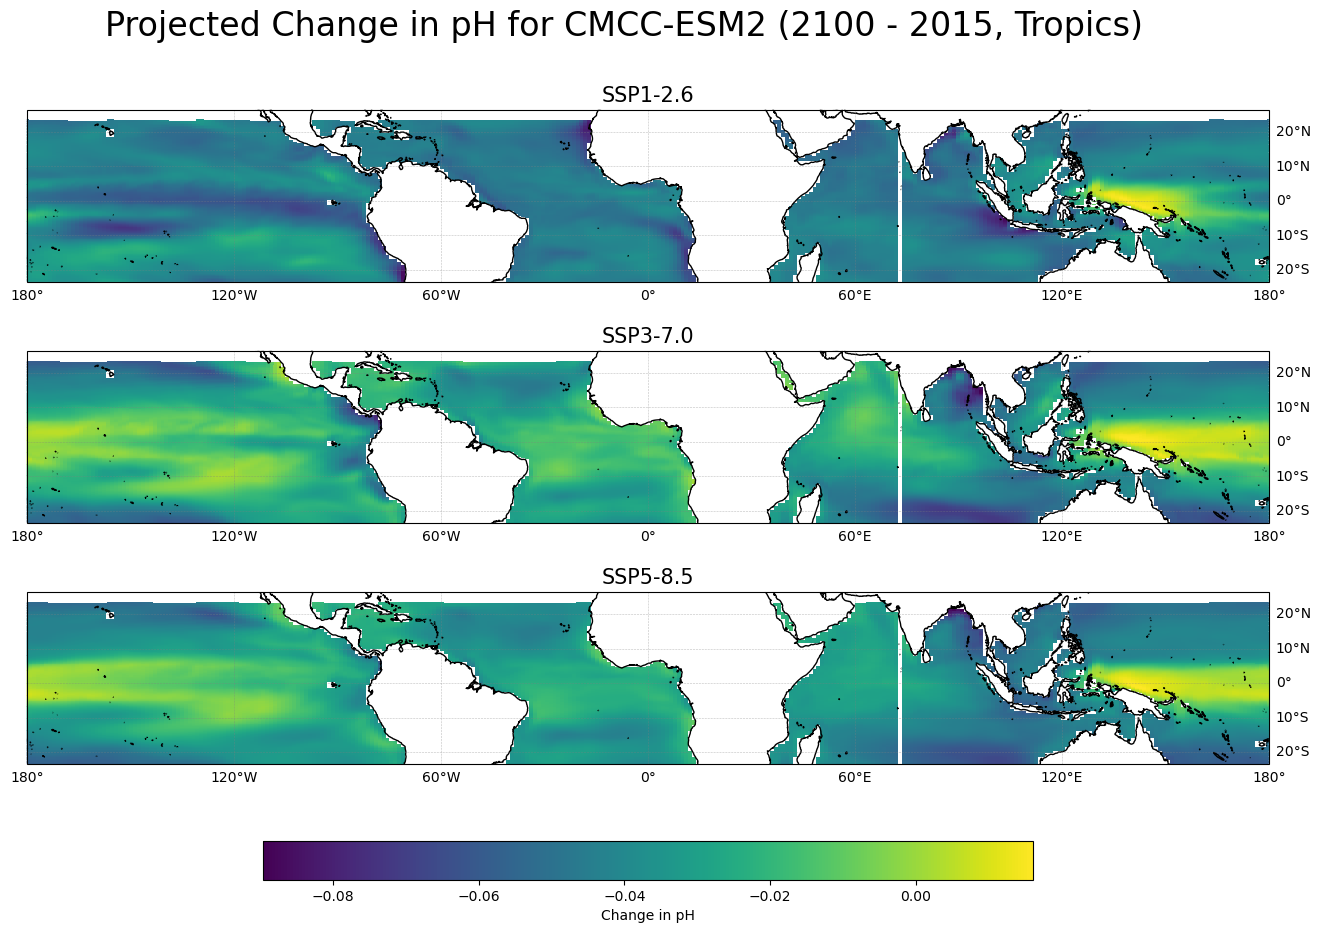

In [37]:
# make a 1×2 grid of PlateCarree axes
fig, axes = plt.subplots(
    nrows=3, ncols=1,
    figsize=(19, 10),
    subplot_kw={'projection': ccrs.PlateCarree()}
)
fig.subplots_adjust(hspace=0.4)

# first panel: historical
mesh1 = axes[0].pcolormesh(cmcc_ph_regridded_126_trop.lon, cmcc_ph_regridded_126_trop.lat, cmcc_ph_regridded_126_trop, shading='auto', cmap='viridis')
axes[0].coastlines()
gl0 = axes[0].gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl0.top_labels = False
gl0.left_labels = False
axes[0].set_title('SSP1‑2.6', fontsize=15)

# second panel: replace hist2_mean with your second DataArray
mesh2 = axes[1].pcolormesh(
    cmcc_ph_regridded_370_trop.lon, cmcc_ph_regridded_370_trop.lat, cmcc_ph_regridded_370_trop, shading='auto', cmap='viridis')
axes[1].coastlines()
gl1 = axes[1].gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl1.top_labels = False
gl1.left_labels = False
axes[1].set_title('SSP3‑7.0', fontsize=15)

# second panel: replace hist2_mean with your second DataArray
mesh3 = axes[2].pcolormesh(
    cmcc_ph_regridded_585_trop.lon, cmcc_ph_regridded_585_trop.lat, cmcc_ph_regridded_585_trop, shading='auto', cmap='viridis')
axes[2].coastlines()
gl2 = axes[2].gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl2.top_labels = False
gl2.left_labels = False
axes[2].set_title('SSP5-8.5', fontsize=15)


# make one horiz. colorbar under both axes
cbar = fig.colorbar(
    mesh1,                      # could be mesh2, it just needs a mappable
    ax=axes,                    # list of the two axes objects
    orientation='horizontal',
    location='bottom',          # put it below
    fraction=0.05,              # fraction of the figure width
    pad=0.1,                   # space between subplots and colorbar
    label='Change in pH'
)
cbar.locator = ticker.AutoLocator()
cbar.update_ticks()

plt.suptitle('Projected Change in pH for CMCC-ESM2 (2100 - 2015, Tropics)', fontsize=24, y=0.98) # Add a suptitle for the whole figure
plt.show()



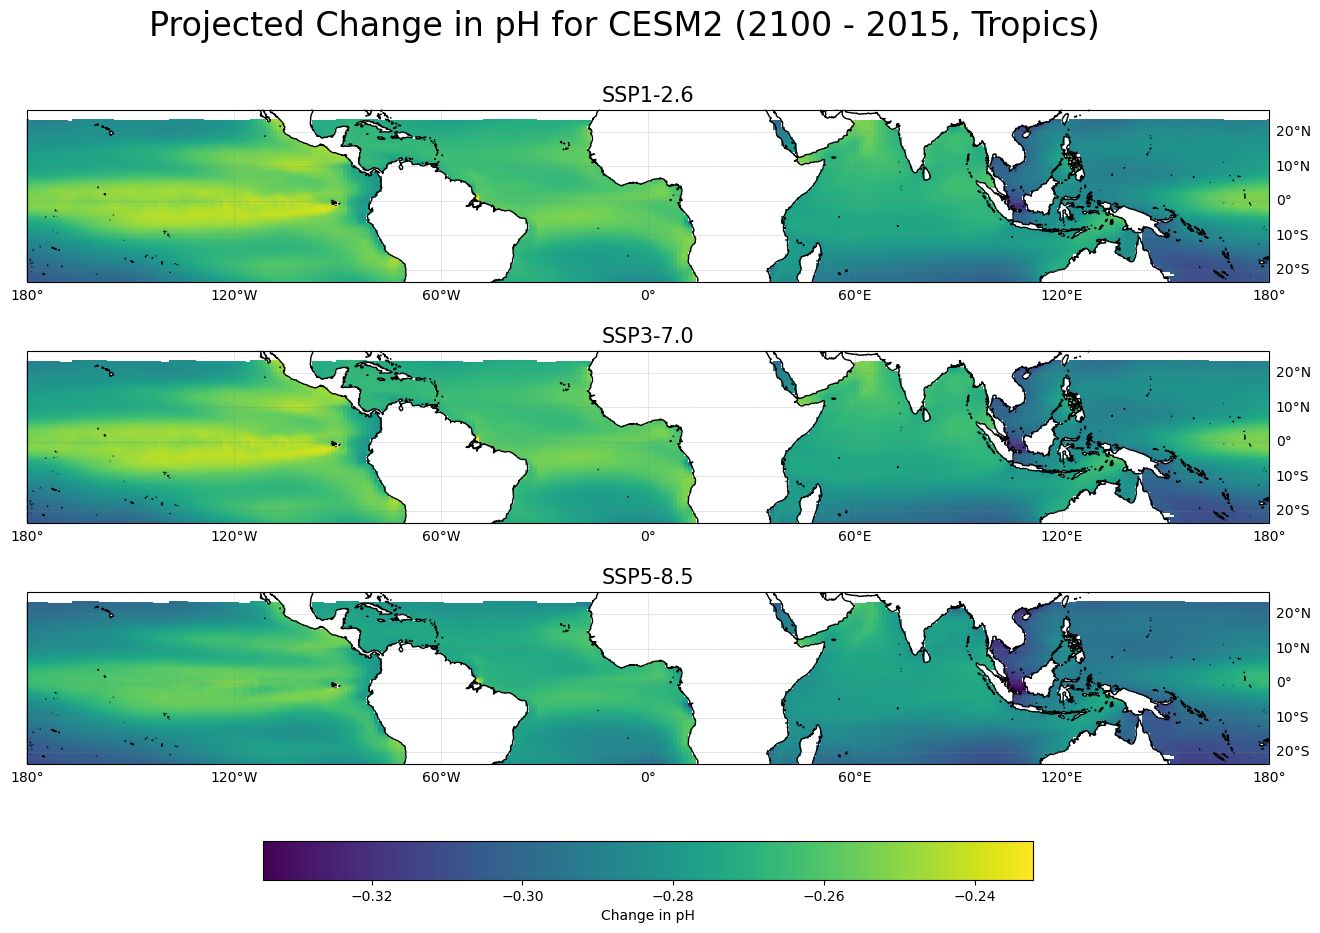

In [38]:
# make a 1×2 grid of PlateCarree axes
fig, axes = plt.subplots(
    nrows=3, ncols=1,
    figsize=(19, 10),
    subplot_kw={'projection': ccrs.PlateCarree()}
)
fig.subplots_adjust(hspace=0.4)

# first panel: historical
mesh1 = axes[0].pcolormesh(CESM2_ssp126_diff_trop.lon, CESM2_ssp126_diff_trop.lat, CESM2_ssp370_diff_trop.ph, shading='auto', cmap='viridis')
axes[0].coastlines()
gl0 = axes[0].gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl0.top_labels = False
gl0.left_labels = False
axes[0].set_title('SSP1‑2.6', fontsize=15)

# second panel: replace hist2_mean with your second DataArray
mesh2 = axes[1].pcolormesh(
    CESM2_ssp370_diff_trop.lon, CESM2_ssp370_diff_trop.lat, CESM2_ssp370_diff_trop.ph, shading='auto', cmap='viridis')
axes[1].coastlines()
gl1 = axes[1].gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl1.top_labels = False
gl1.left_labels = False
axes[1].set_title('SSP3‑7.0', fontsize=15)

# second panel: replace hist2_mean with your second DataArray
mesh3 = axes[2].pcolormesh(
    CESM2_ssp585_diff_trop.lon, CESM2_ssp585_diff_trop.lat, CESM2_ssp585_diff_trop.ph, shading='auto', cmap='viridis')
axes[2].coastlines()
gl2 = axes[2].gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl2.top_labels = False
gl2.left_labels = False
axes[2].set_title('SSP5-8.5', fontsize=15)


# make one horiz. colorbar under both axes
cbar = fig.colorbar(
    mesh1,                      # could be mesh2, it just needs a mappable
    ax=axes,                    # list of the two axes objects
    orientation='horizontal',
    location='bottom',          # put it below
    fraction=0.05,              # fraction of the figure width
    pad=0.1,                   # space between subplots and colorbar
    label='Change in pH'
)
cbar.locator = ticker.AutoLocator()
cbar.update_ticks()

plt.suptitle('Projected Change in pH for CESM2 (2100 - 2015, Tropics)', fontsize=24, y=0.98) # Add a suptitle for the whole figure
plt.show()



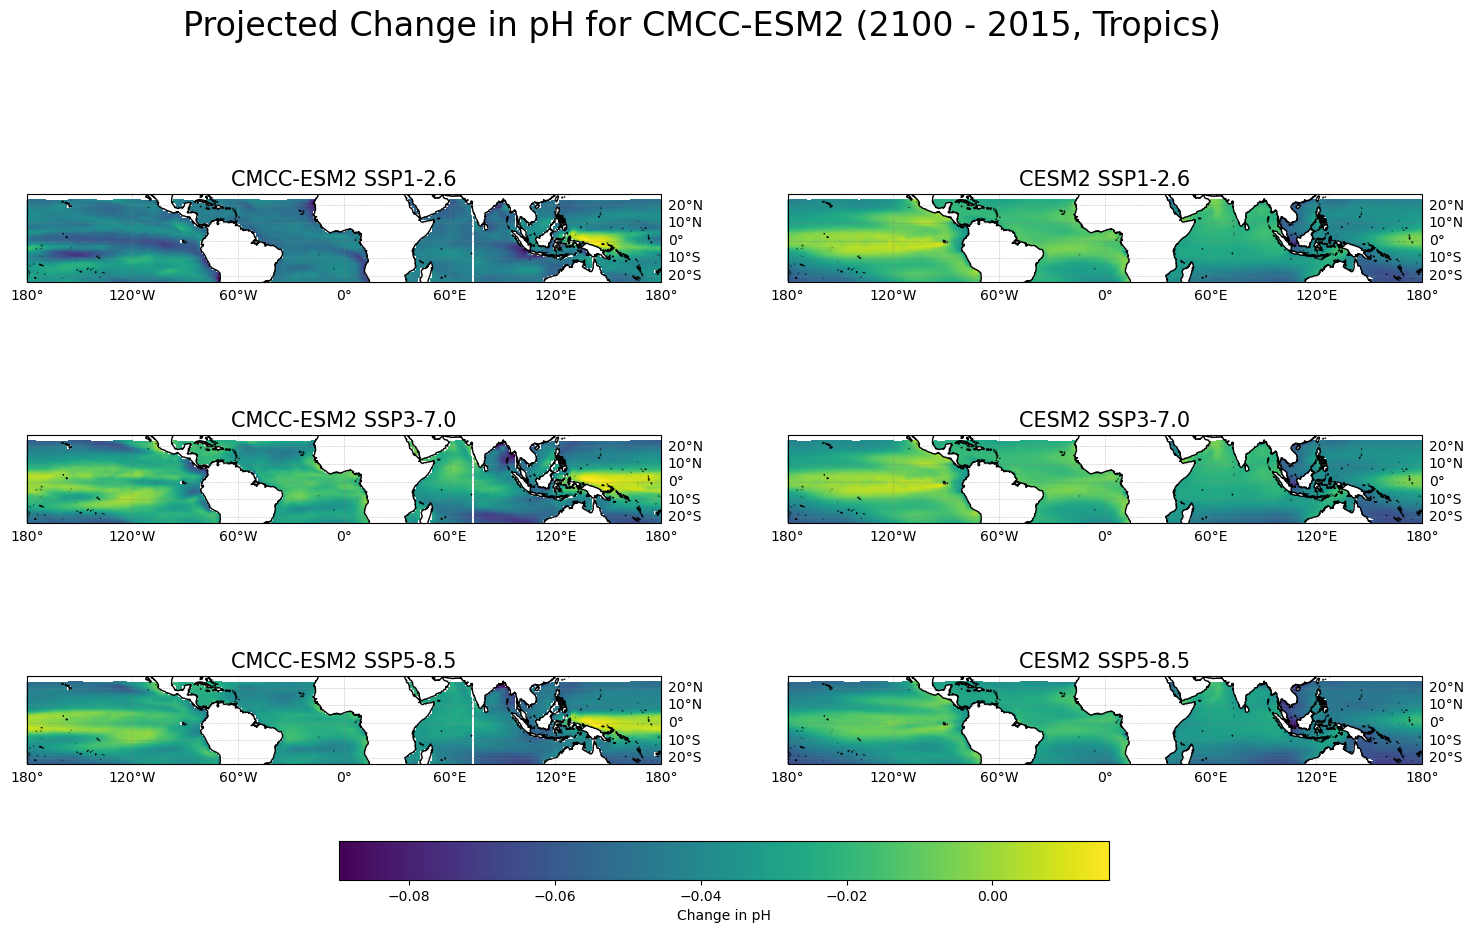

In [39]:
# make a 1×2 grid of PlateCarree axes
fig, axes = plt.subplots(
    nrows=3, ncols=2,
    figsize=(18, 10),
    subplot_kw={'projection': ccrs.PlateCarree()}
)
fig.subplots_adjust(hspace=0.4)

# first panel: historical
mesh1 = axes[0,0].pcolormesh(cmcc_ph_regridded_126_trop.lon, cmcc_ph_regridded_126_trop.lat, cmcc_ph_regridded_126_trop, shading='auto', cmap='viridis')
axes[0,0].coastlines()
gl0 = axes[0,0].gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl0.top_labels = False
gl0.left_labels = False
axes[0,0].set_title('CMCC-ESM2 SSP1‑2.6', fontsize=15)

# second panel: replace hist2_mean with your second DataArray
mesh2 = axes[1,0].pcolormesh(
    cmcc_ph_regridded_370_trop.lon, cmcc_ph_regridded_370_trop.lat, cmcc_ph_regridded_370_trop, shading='auto', cmap='viridis')
axes[1,0].coastlines()
gl1 = axes[1,0].gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl1.top_labels = False
gl1.left_labels = False
axes[1,0].set_title('CMCC-ESM2 SSP3‑7.0', fontsize=15)

# second panel: replace hist2_mean with your second DataArray
mesh3 = axes[2,0].pcolormesh(
    cmcc_ph_regridded_585_trop.lon, cmcc_ph_regridded_585_trop.lat, cmcc_ph_regridded_585_trop, shading='auto', cmap='viridis')
axes[2,0].coastlines()
gl2 = axes[2,0].gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl2.top_labels = False
gl2.left_labels = False
axes[2,0].set_title('CMCC-ESM2 SSP5-8.5', fontsize=15)

# first panel: historical
mesh4 = axes[0,1].pcolormesh(CESM2_ssp126_diff_trop.lon, CESM2_ssp126_diff_trop.lat, CESM2_ssp370_diff_trop.ph, shading='auto', cmap='viridis')
axes[0,1].coastlines()
gl0 = axes[0,1].gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl0.top_labels = False
gl0.left_labels = False
axes[0,1].set_title('CESM2 SSP1‑2.6', fontsize=15)

# second panel: replace hist2_mean with your second DataArray
mesh5 = axes[1,1].pcolormesh(
    CESM2_ssp370_diff_trop.lon, CESM2_ssp370_diff_trop.lat, CESM2_ssp370_diff_trop.ph, shading='auto', cmap='viridis')
axes[1,1].coastlines()
gl1 = axes[1,1].gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl1.top_labels = False
gl1.left_labels = False
axes[1,1].set_title('CESM2 SSP3‑7.0', fontsize=15)

# second panel: replace hist2_mean with your second DataArray
mesh6 = axes[2,1].pcolormesh(
    CESM2_ssp585_diff_trop.lon, CESM2_ssp585_diff_trop.lat, CESM2_ssp585_diff_trop.ph, shading='auto', cmap='viridis')
axes[2,1].coastlines()
gl2 = axes[2,1].gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5, linestyle='--')
gl2.top_labels = False
gl2.left_labels = False
axes[2,1].set_title('CESM2 SSP5-8.5', fontsize=15)

# make one horiz. colorbar under both axes
cbar = fig.colorbar(
    mesh1,                      # could be mesh2, it just needs a mappable
    ax=axes,                    # list of the two axes objects
    orientation='horizontal',
    location='bottom',          # put it below
    fraction=0.05,              # fraction of the figure width
    pad=0.1,                   # space between subplots and colorbar
    label='Change in pH'
)
cbar.locator = ticker.AutoLocator()
cbar.update_ticks()

plt.suptitle('Projected Change in pH for CMCC-ESM2 (2100 - 2015, Tropics)', fontsize=24) # Add a suptitle for the whole figure
plt.show()



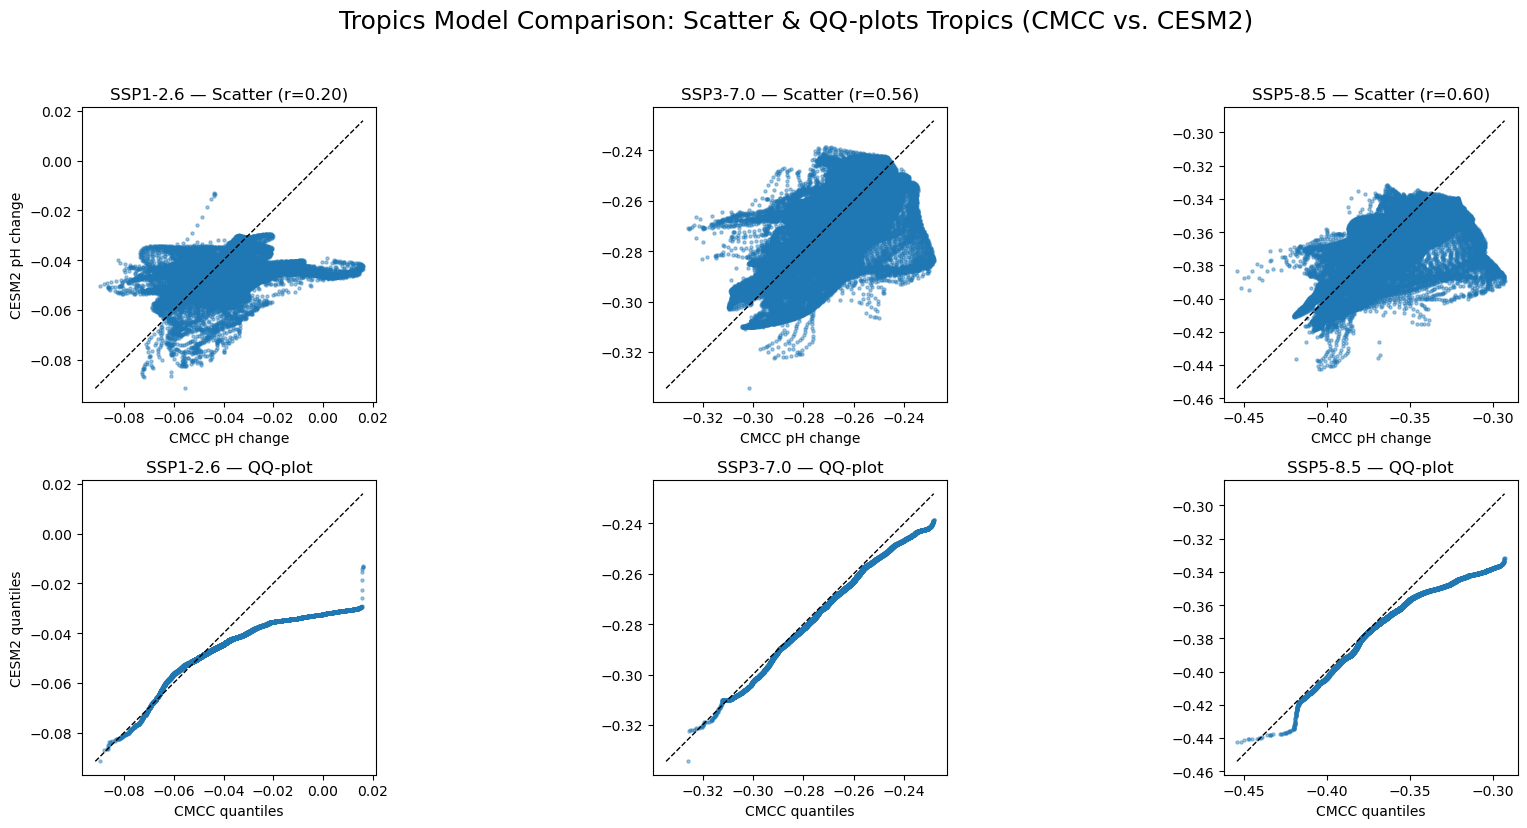

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# === Helper functions ===
def to_da(ds, var='ph'):
    return ds[var] if isinstance(ds, xr.Dataset) else ds

def flatten_and_mask(da1, da2):
    x = da1.values.ravel()
    y = da2.values.ravel()
    mask = np.isfinite(x) & np.isfinite(y)
    return x[mask], y[mask]

# === Tropical CMCC and CESM2 data ===
cmcc_list = [
    to_da(cmcc_ph_regridded_126_trop),
    to_da(cmcc_ph_regridded_370_trop),
    to_da(cmcc_ph_regridded_585_trop),
]

cesm_list = [
    to_da(CESM2_ssp126_diff_trop),
    to_da(CESM2_ssp370_diff_trop),
    to_da(CESM2_ssp585_diff_trop),
]

titles = ['SSP1‑2.6', 'SSP3‑7.0', 'SSP5‑8.5']

# === Create 2×3 panel figure ===
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

for i, (cmcc, cesm, ttl) in enumerate(zip(cmcc_list, cesm_list, titles)):
    # Flatten and mask
    x, y = flatten_and_mask(cmcc, cesm)

    # Pearson correlation
    r = np.corrcoef(x, y)[0, 1]

    # === Scatter plot (top row) ===
    ax1 = axes[0, i]
    ax1.scatter(x, y, s=5, alpha=0.4)
    lims = [min(x.min(), y.min()), max(x.max(), y.max())]
    ax1.plot(lims, lims, 'k--', lw=1)
    ax1.set_aspect('equal', 'box')
    ax1.set_xlabel('CMCC pH change')
    if i == 0:
        ax1.set_ylabel('CESM2 pH change')
    ax1.set_title(f'{ttl} — Scatter (r={r:.2f})')

    # === QQ plot (bottom row) ===
    ax2 = axes[1, i]
    ax2.scatter(np.sort(x), np.sort(y), s=5, alpha=0.4)
    ax2.plot(lims, lims, 'k--', lw=1)
    ax2.set_aspect('equal', 'box')
    ax2.set_xlabel('CMCC quantiles')
    if i == 0:
        ax2.set_ylabel('CESM2 quantiles')
    ax2.set_title(f'{ttl} — QQ-plot')

plt.suptitle('Tropics Model Comparison: Scatter & QQ-plots Tropics (CMCC vs. CESM2)', fontsize=18, y=1.03)
plt.savefig("stat_test1")
plt.tight_layout()
plt.show()


In [41]:
# Time series 

CESM2_ssp126_ts = subset_southern_ocean(CESM2_ssp126)
CMCC_ssp126_ts = subset_southern_ocean(CMCC_ssp126)
regridder_ssp126 = create_regridder(CMCC_ssp126_ts, CESM2_ssp126_ts)
if regridder_ssp126:
    cmcc_ph_regridded_126_ts = regrid_dataset(CMCC_ssp126_ts, regridder_ssp126, 'ph')
    if cmcc_ph_regridded_126 is not None:
        print("Regridded CMCC 'ph' (ssp126):", cmcc_ph_regridded_126_ts)

CESM2_ssp370_ts = subset_southern_ocean(CESM2_ssp370)
CMCC_ssp370_ts = subset_southern_ocean(CMCC_ssp370)
regridder_ssp370 = create_regridder(CMCC_ssp370_ts, CESM2_ssp370_ts)
if regridder_ssp370:
    cmcc_ph_regridded_370_ts = regrid_dataset(CMCC_ssp370_ts, regridder_ssp370, 'ph')
    if cmcc_ph_regridded_126 is not None:
        print("Regridded CMCC 'ph' (ssp370):", cmcc_ph_regridded_370_ts)

CESM2_ssp585_ts = subset_southern_ocean(CESM2_ssp585)
CMCC_ssp585_ts = subset_southern_ocean(CMCC_ssp585)
regridder_ssp585 = create_regridder(CMCC_ssp585_ts, CESM2_ssp585_ts)
if regridder_ssp585:
    cmcc_ph_regridded_585_ts = regrid_dataset(CMCC_ssp585_ts, regridder_ssp585, 'ph')
    if cmcc_ph_regridded_126 is not None:
        print("Regridded CMCC 'ph' (ssp585):", cmcc_ph_regridded_585_ts)

# Now take the mean 


Regridded CMCC 'ph' (ssp126): <xarray.DataArray (dcpp_init_year: 1, time: 86, nlat: 36, nlon: 320)>
array([[[[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         ...,
         [8.056386 , 8.055569 , 8.0553665, ..., 8.062173 , 8.060151 ,
          8.057986 ],
         [8.056884 , 8.056182 , 8.0561285, ..., 8.06215  , 8.0605135,
          8.058548 ],
         [8.057233 , 8.056383 , 8.056263 , ..., 8.061661 , 8.060583 ,
          8.059021 ]],

        [[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
...
         [8.020454 , 8.018798 , 8.0178585, ..., 8.02

In [42]:
CESM2_ssp126_ts_mean = CESM2_ssp126_ts.mean(dim=('nlat','nlon', 'dcpp_init_year'))
CESM2_ssp370_ts_mean = CESM2_ssp370_ts.mean(dim=('nlat','nlon', 'dcpp_init_year'))
CESM2_ssp585_ts_mean = CESM2_ssp585_ts.mean(dim=('nlat','nlon', 'dcpp_init_year'))

cmcc_ph_regridded_126_ts_mean = cmcc_ph_regridded_126_ts.mean(dim=('nlat','nlon', 'dcpp_init_year'))
cmcc_ph_regridded_370_ts_mean = cmcc_ph_regridded_370_ts.mean(dim=('nlat','nlon', 'dcpp_init_year'))
cmcc_ph_regridded_585_ts_mean =  cmcc_ph_regridded_585_ts.mean(dim=('nlat','nlon', 'dcpp_init_year'))


In [43]:
# compute CI
def compute_ci(ts, dims=('nlat','nlon','dcpp_init_year')):
    std = ts.std(dim=dims)
    n = np.prod([ts.sizes[d] for d in dims])  # total sample size
    se = std / np.sqrt(n)
    return 1.96 * se  # 95% CI


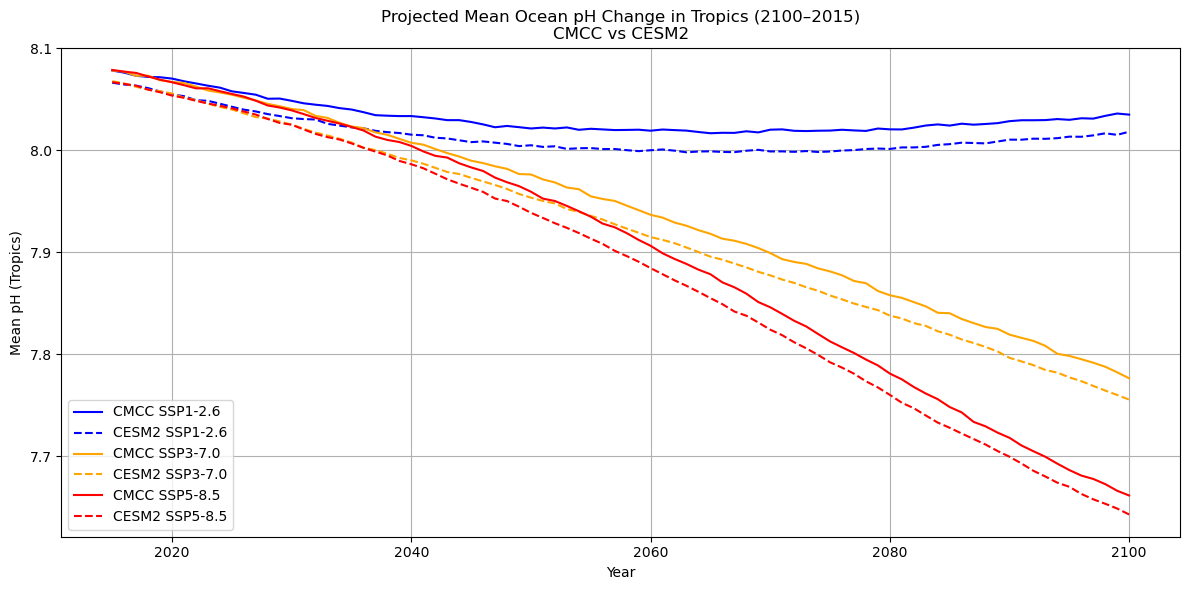

In [51]:
cmcc_means = [
    cmcc_ph_regridded_126_ts_mean,
    cmcc_ph_regridded_370_ts_mean,
    cmcc_ph_regridded_585_ts_mean ]
cesm_means = [
    CESM2_ssp126_ts_mean,
    CESM2_ssp370_ts_mean,
    CESM2_ssp585_ts_mean ]

labels = ['SSP1‑2.6', 'SSP3‑7.0', 'SSP5‑8.5']
colors = ['blue', 'orange', 'red']

cmcc_cis = [
    compute_ci(cmcc_ph_regridded_126_ts, dims=('nlat','nlon','dcpp_init_year')),
    compute_ci(cmcc_ph_regridded_370_ts, dims=('nlat','nlon','dcpp_init_year')),
    compute_ci(cmcc_ph_regridded_585_ts, dims=('nlat','nlon','dcpp_init_year')) ]

cesm_cis = [
    compute_ci(CESM2_ssp126_ts, dims=('nlat','nlon','dcpp_init_year')),
    compute_ci(CESM2_ssp370_ts, dims=('nlat','nlon','dcpp_init_year')),
    compute_ci(CESM2_ssp585_ts, dims=('nlat','nlon','dcpp_init_year')) ]

plt.figure(figsize=(12, 6))

for i in range(3):
    # Extract time as plain np array of years
    time = cmcc_means[i].time.dt.year.values

    # Convert everything to np arrays for plotting
    cmcc_mean = cmcc_means[i].values
    cmcc_ci   = cmcc_cis[i].values

    cesm_mean = cesm_means[i]['ph'].values  # get DataArray from Dataset
    cesm_ci   = cesm_cis[i].values

    # CMCC line and CI
    plt.plot(time, cmcc_mean, label=f'CMCC {labels[i]}', color=colors[i], linestyle='-')
 #   plt.fill_between(time, cmcc_mean - cmcc_ci, cmcc_mean + cmcc_ci,
                    # color=colors[i], alpha=0.2)

    # CESM2 line and CI
    plt.plot(time, cesm_mean, label=f'CESM2 {labels[i]}', color=colors[i], linestyle='--')
  #  plt.fill_between(time, cesm_mean - cesm_ci, cesm_mean + cesm_ci,
                  #   color=colors[i], alpha=0.2)

plt.xlabel('Year')
plt.ylabel('Mean pH (Tropics)')
plt.title('Projected Mean Ocean pH Change in Tropics (2100–2015)\nCMCC vs CESM2')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
